In [1]:
import torch
import numpy as np
from pathlib import Path
import torch.utils.data as data_utils
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms
import os
import glob
import os.path as osp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#path=os.getcwd()+'/training_data_numpy/'
path='../project_data/'

## <a> 1.LoaderDataSet</a> 

In [107]:
class MammogramDataset(Dataset):
    def __init__(self):
        self.files_features=[]
        self.files_labels=[]
        self.transform=transforms.ToTensor()
        
        #Features
        
        feature_files=glob.glob(osp.join(path,'*count*.npz'))
        feature_files=sorted(feature_files)
        
        for f in feature_files:
                #num_imgs=int(f[f.index(' '):f.index('.')])
                num_imgs=int(f.split(" ")[1].split(".")[0])
                for i in range(num_imgs):
                    self.files_features.append(f[:f.index('.npz')]+'-'+str(i)+'.npz')
        
        self.len=len(self.files_features)
        
        
        #Labels
        
        labels_files=glob.glob(osp.join(path,'*class_arr.npz'))
        labels_files=sorted(labels_files)
        
        first_array=np.load(labels_files[0])
        training_labels=first_array['arr_0']
        
        for f in range(len(labels_files)-1):
            array= np.load(labels_files[f])
            training_labels=np.concatenate((training_labels,array['arr_0']),axis=0)
        
        self.training_labels=training_labels
        
    
    def __getitem__(self, index):
        """ Get a sample from the dataset
        """
        file=self.files_features[index]
        file_name=file[:file.index('-')]+'.npz'
        
        image_number=int(file.split("-")[1].split(".npz")[0])
        array_feature= np.load(file_name)
        selected_feature=array_feature['arr_0'][:,:,image_number]
        
        label=self.training_labels[index]
        
        
        return self.transform(selected_feature), label
    
    def __len__(self):
        return self.len

In [108]:
mam=MammogramDataset()

In [109]:
print(len(mam))

55885


label: 0


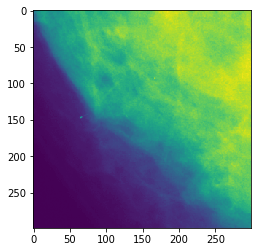

In [112]:
datapoint=mam[0]
image=datapoint[0]
label=datapoint[1]
print("label:", label)
plt.imshow(image[0].numpy())

In [123]:
loader_dataset = data_utils.DataLoader(mam, batch_size=4, shuffle = True)

In [124]:
batch = next(iter(loader_dataset))

In [125]:
images, labels = batch

In [126]:
labels

tensor([0, 2, 0, 0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels: tensor([0, 2, 0, 0])


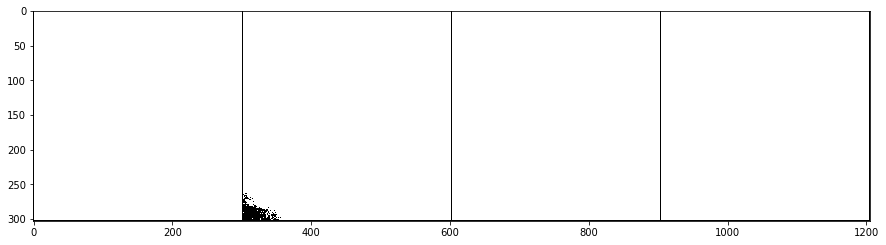

In [128]:
grid = torchvision.utils.make_grid(images, nrow=4)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', labels)